Load and Preprocess the Data


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the dataset
url = "https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv"
data = pd.read_csv(url)

# Features and labels
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Encode labels into one-hot vectors
encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)


In [13]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#Define the Neural Network


In [14]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2


#Forward Propagation


In [15]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=0, keepdims=True))  # Stability improvement
    return exp_z / np.sum(exp_z, axis=0, keepdims=True)

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


#Loss Function


In [16]:
def compute_loss(Y, A2):
    m = Y.shape[0]
    return -np.sum(Y.T * np.log(A2)) / m


#Backward Propagation


In [17]:
def backward_propagation(X, Y, Z1, A1, A2, W1, W2):
    m = X.shape[0]
    dZ2 = A2 - Y.T
    dW2 = np.dot(dZ2, A1.T) / m
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    dZ1 = np.dot(W2.T, dZ2) * (A1 * (1 - A1))
    dW1 = np.dot(dZ1, X) / m
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    return dW1, db1, dW2, db2


#Update Parameters


In [18]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2


#Training Loop


In [19]:
def train_nn(X_train, y_train, input_size, hidden_size, output_size, learning_rate, epochs):
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(X_train, W1, b1, W2, b2)
        loss = compute_loss(y_train, A2)
        dW1, db1, dW2, db2 = backward_propagation(X_train, y_train, Z1, A1, A2, W1, W2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {loss:.4f}")

    return W1, b1, W2, b2


#Prediction


In [20]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=0)


#Train the Model


In [21]:
# Define network dimensions
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

# Train the neural network
W1, b1, W2, b2 = train_nn(X_train, y_train, input_size, hidden_size, output_size, learning_rate=0.1, epochs=1000)


Epoch 0: Loss = 1.0988
Epoch 100: Loss = 1.0937
Epoch 200: Loss = 0.9011
Epoch 300: Loss = 0.5909
Epoch 400: Loss = 0.4785
Epoch 500: Loss = 0.4168
Epoch 600: Loss = 0.3708
Epoch 700: Loss = 0.3324
Epoch 800: Loss = 0.2990
Epoch 900: Loss = 0.2694


#Evaluate the Model


In [22]:
# Predict on test set
y_pred = predict(X_test, W1, b1, W2, b2)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = np.mean(y_pred == y_true)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Test Accuracy: 96.67%


#Lab Task

You are provided with a neural network (NN) implementation designed for classification tasks (e.g., predicting Iris species). Your task is to convert this NN into a regressor and train it on the [Boston Housing](https://github.com/selva86/datasets/blob/master/BostonHousing.csv) dataset to predict the median value of houses in a given area.

Requirements:

- Update the output layer to output a single continuous value.
  Change the activation function of the output layer to linear.
  Replace the cross-entropy loss function with mean squared error (MSE).
  Dataset Preparation:

- Use the Boston Housing dataset for training and testing.
  Split the dataset into 80% training and 20% testing.
  Scale the input features using standardization.
  Training:

- Train the NN on the Boston Housing dataset for 1000 epochs with a learning rate of 0.01.
- Print the MSE loss every 100 epochs.
  Evaluation:

Predict the median house prices on the test set.
Calculate and report the Mean Absolute Error (MAE) and R² score on the test set.
Visualizations:

Plot a graph showing the actual vs. predicted house prices for the test set.


Epoch 100/1000, MSE Loss: 18.9254
Epoch 200/1000, MSE Loss: 13.8633
Epoch 300/1000, MSE Loss: 12.0686
Epoch 400/1000, MSE Loss: 10.9914
Epoch 500/1000, MSE Loss: 10.4205
Epoch 600/1000, MSE Loss: 10.0226
Epoch 700/1000, MSE Loss: 9.6706
Epoch 800/1000, MSE Loss: 9.3749
Epoch 900/1000, MSE Loss: 9.0153
Epoch 1000/1000, MSE Loss: 8.5254

Mean Absolute Error (MAE): 2.57
R² Score: 0.83


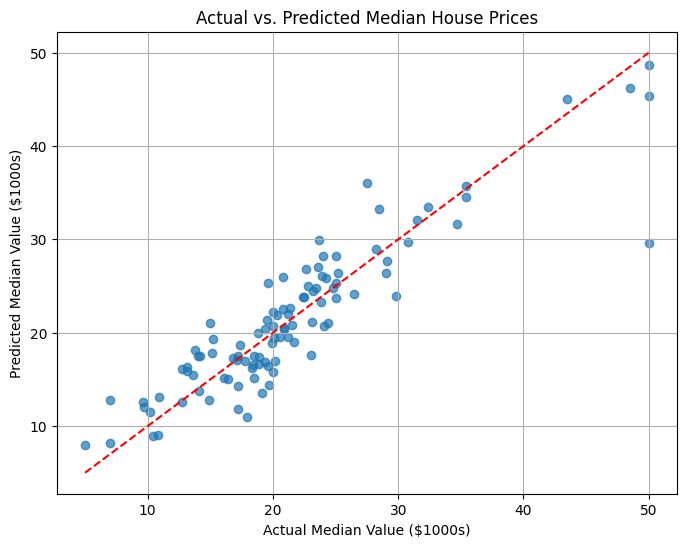

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# Load Boston Housing dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

# Features and target
X = data.iloc[:, :-1].values
y = data['medv'].values.reshape(-1, 1)

# Standardize input features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Neural Network architecture
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    return W1, b1, W2, b2

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0

def forward_propagation(X, W1, b1, W2, b2):
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2  # Linear activation
    return Z1, A1, Z2

def compute_mse_loss(y_pred, y_true):
    m = y_true.shape[1]
    return np.sum((y_pred - y_true) ** 2) / m

def backward_propagation(X, y, Z1, A1, Z2, W2):
    m = X.shape[1]
    dZ2 = (Z2 - y)
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.dot(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

def train(X, y, hidden_size=10, epochs=1000, lr=0.01):
    input_size = X.shape[0]
    output_size = 1
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        Z1, A1, Z2 = forward_propagation(X, W1, b1, W2, b2)
        loss = compute_mse_loss(Z2, y)
        dW1, db1, dW2, db2 = backward_propagation(X, y, Z1, A1, Z2, W2)

        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

        if (epoch + 1) % 100 == 0:
            print(f"Epoch {epoch+1}/{epochs}, MSE Loss: {loss:.4f}")

    return W1, b1, W2, b2

# Prepare input shape (features as columns, samples as columns)
X_train_T = X_train.T
y_train_T = y_train.T

# Train model
W1, b1, W2, b2 = train(X_train_T, y_train_T, hidden_size=10, epochs=1000, lr=0.01)

# Predict
def predict(X, W1, b1, W2, b2):
    _, _, Z2 = forward_propagation(X, W1, b1, W2, b2)
    return Z2

y_pred_test = predict(X_test.T, W1, b1, W2, b2).T

# Evaluation
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"\nMean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Median Value ($1000s)")
plt.ylabel("Predicted Median Value ($1000s)")
plt.title("Actual vs. Predicted Median House Prices")
plt.grid(True)
plt.show()
